# Twitter data analysis of tweets with #querdenken
### Aims
* learn how to use the Twitter API with Python
* get into the basics of text mining and NLP
* get an idea about #querdenken tweets using discriptive analysis, sentiment analysis, bigrams 
* get better at data manipulation using pandas

In [436]:
#import sys
#!{sys.executable} -m pip install tweepy

In [432]:
#import sys
#!{sys.executable} -m pip install googletrans

In [433]:
#import sys
#!{sys.executable} -m pip install geotext

In [434]:
#import sys
#!{sys.executable} -m pip install nltk 

In [435]:
#import sys
#!{sys.executable} -m pip install vaderSentiment

In [208]:
import os
import tweepy as tw
import pandas as pd
import numpy as np 

# Getting tweets from Twitter

In [2]:
consumer_key= 'xxx'
consumer_secret= 'xxx'
access_token= 'xxx'
access_token_secret= 'xxx'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [250]:
# Define the search term and the date_since date as variables
search_words = "#querdenken"
date_since = "2020-10-01"


In [251]:
#tweepy documentation: https://pythonhosted.org/tweepy/index.html
new_search = search_words + " -filter:retweets"
new_search

'#querdenken -filter:retweets'

In [259]:
#get all available attributes

tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="de",
                           tweet_mode="extended",
                           retry_count = 5, #retry 5 times
                           retry_delay = 5, #seconds to wait for retry
                           since=date_since).items(5000)


users_locs = [[tweet.id, tweet.full_text, tweet.created_at,tweet.user.screen_name, tweet.user.location, tweet.geo, tweet.coordinates, tweet.in_reply_to_status_id, #tweet.quote_count, tweet.reply_count,
               tweet.retweet_count, tweet.favorite_count] for tweet in tweets]
users_locs

[[1332079879794417672,
  'Hallo #Querdenken.\nZwei Tatsachen:\nDeutschland ist dichter bewohnt als die USA.\nDie USA haben eine Viertelmillion(!) Menschen verloren; Millionen erleiden Behinderungen.\n\nEs könnte hier ganz anders aussehen. Wenn man auf Leute wie euch hören würde.',
  datetime.datetime(2020, 11, 26, 21, 52, 46),
  'felis_rex',
  'Berlin',
  None,
  None,
  None,
  0,
  0],
 [1332079613015633920,
  'Alice im Lügenland darf heute in den @tagesthemen ihre Unwahrheiten verbreiten. Tja, ich kann am Beispiel #Bautzen die Struktur der #NeuenRechten darlegen. #AfD, #Reichsbürger, #IB und #Querdenken ist eine Bewegung. Du kommst damit nicht durch @Alice_Weidel!',
  datetime.datetime(2020, 11, 26, 21, 51, 43),
  'BirgitKieschni1',
  'Bautzen, Sachsen',
  None,
  None,
  None,
  0,
  6],
 [1332075645166374917,
  "Parkplätze gibt's, jetzt scheitert es halt am Wetter \n\naus Querdenken621\n\n#querdenken #noquerdenken #leerdenker \n@Volksverpetzer @querdenkenwatch @schwurbelwatch http

In [260]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['id', 'text', 'created_at', 'user', 'location', 'geo', 'coordinates', 'in_reply_to_status_id', 'retweet_count', 'favorite_count'])
tweet_text

,id,text,created_at,user,location,geo,coordinates,in_reply_to_status_id,retweet_count,favorite_count
0,1332079879794417672,Hallo #Querdenken.\nZwei Tatsachen:\nDeutschla...,2020-11-26 21:52:46,felis_rex,Berlin,None,None,NaN,0,0
1,1332079613015633920,Alice im Lügenland darf heute in den @tagesthe...,2020-11-26 21:51:43,BirgitKieschni1,"Bautzen, Sachsen",None,None,NaN,0,6
2,1332075645166374917,"Parkplätze gibt's, jetzt scheitert es halt am ...",2020-11-26 21:35:57,demoticker161,Berlin,None,None,NaN,0,0
3,1332071626050048001,aaachso. #AttilaHildmann #Querdenken #Querdenk...,2020-11-26 21:19:59,2sofiaxy,,None,None,NaN,0,1
4,1332071317454118914,"Karel kritisiert, dass immer wieder Beiträge v...",2020-11-26 21:18:45,LeaksQuer,,None,None,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...
4352,1328797001467764738,"Mein Tweet über NS - Relativierer, #Querdenken...",2020-11-17 20:27:47,MartinStauder,Regensburg,None,None,NaN,0,0
4353,1328796327845761024,"@roman2838 @janskudlarek Ich tippe auf den ""Fa...",2020-11-17 20:25:07,humbughund,,None,None,1.328794e+18,0,0
4354,1328795522711302144,Auch aus #Kassel mobilisieren Schwurbler*innen...,2020-11-17 20:21:55,derquenken,,None,None,NaN,0,0
4355,1328795221103161353,NIEDER MIT DER STRAẞENVERKEHRSORDNUNGS-DIKTATU...,2020-11-17 20:20:43,Jody2903,Moin Meister,None,None,NaN,0,1


In [180]:
tweet_text.text[1]

'9 min Wahnsinn 😂🤣😅. Guckt euch das an. Viele #Janas #Covidioten #Deppen #Nazis und verrückte Menschen.\n\nIch lache gerade Tränen und habe erst 2 min geguckt😂. \n#fckafd \n\nSchau dir "Der Corona-Soundtrack, Vol. 2: "Best Of" Hygienedemos" auf YouTube an https://t.co/eVgkDEVdZq'

In [265]:
#Clean out all the tweets that are replies
tweet_text=tweet_text.loc[tweet_text['in_reply_to_status_id'].isnull()]

In [296]:
tweet_text.shape

(3204, 14)

In [529]:
tweet_text.head()

,id,text,created_at,user,location,geo,coordinates,in_reply_to_status_id,retweet_count,favorite_count,...,location_city,sentiment_class,text_cleaned_full,text_cleaned_full_without_stop_words,compound,neg,neu,pos,text_hashtags_only,created_date
0,1332079879794417672,Hallo #Querdenken.\nZwei Tatsachen:\nDeutschla...,2020-11-26 21:52:46,felis_rex,Berlin,NaN,NaN,NaN,0,0,...,Berlin,1,hallo querdenken zwei tatsachen deutschland is...,hallo querdenken zwei tatsachen deutschland di...,-0.8439,0.197,0.803,0.0,#querdenken,2020-11-26 21:52:46
1,1332079613015633920,Alice im Lügenland darf heute in den @tagesthe...,2020-11-26 21:51:43,BirgitKieschni1,"Bautzen, Sachsen",NaN,NaN,NaN,0,6,...,Bautzen,1,alice im lügenland darf heute in den ihre unw...,alice lügenland darf heute unwahrheiten verbre...,-0.6360,0.107,0.893,0.0,#bautzen #neuenrechten #afd #reichsbürger #ib ...,2020-11-26 21:51:43
2,1332075645166374917,"Parkplätze gibt's, jetzt scheitert es halt am ...",2020-11-26 21:35:57,demoticker161,Berlin,NaN,NaN,NaN,0,0,...,Berlin,3,parkplätze gibts jetzt scheitert es halt am we...,parkplätze gibts scheitert halt wetter querden...,0.0000,0.000,1.000,0.0,#querdenken #noquerdenken #leerdenker,2020-11-26 21:35:57
3,1332071626050048001,aaachso. #AttilaHildmann #Querdenken #Querdenk...,2020-11-26 21:19:59,2sofiaxy,NaN,NaN,NaN,NaN,0,1,...,NaN,3,aaachso attilahildmann querdenken querdenker i...,aaachso attilahildmann querdenken querdenker i...,0.0000,0.000,1.000,0.0,#attilahildmann #querdenken #querdenker #impfe...,2020-11-26 21:19:59
4,1332071317454118914,"Karel kritisiert, dass immer wieder Beiträge v...",2020-11-26 21:18:45,LeaksQuer,NaN,NaN,NaN,NaN,0,2,...,NaN,1,karel kritisiert dass immer wieder beiträge vo...,karel kritisiert immer beiträge neonazis querd...,-0.5994,0.196,0.804,0.0,#querdenken,2020-11-26 21:18:45


## translate tweets to english

In [539]:
#from googletrans import Translator

#translator = Translator()
#translator.translate('Damit niemand auf die FakeNews reinfällt').text

In [263]:
#tweet_text['translated_en']=tweet_text['text'].apply(translator.translate, src='de', dest='en').apply(getattr, args=('text',))

In [443]:
#tweet_text.head()

## Pre process text


In [269]:
#from nltk.corpus import stopwords
# stopwords from nltk package 
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
import re
import string
#from itertools import groupby
#import pyLDAvis
#import pyLDAvis.sklearn
#pyLDAvis.enable_notebook()


In [455]:
# preprocess with re package for regular expressions and nltk
# preprocessing of text on python: https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908

def clean_text(text):
    '''Make text lowercase, remove reply, remove text in square brackets, remove links, remove user mention,
    remove punctuation except #, remove numbers and remove words containing numbers.'''
        
    text = text.lower()
    text = re.sub('^rt', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(re_url, '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('@\w+', '', text)
    remove = string.punctuation
    remove = remove.replace("#", "") # don't remove hashtag
    text = re.sub('[%s]' % re.escape(remove), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [454]:
stop_words = stopwords.words('german')

re_url = r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'

In [540]:
#stop_words

In [456]:
# Apply cleaning function

tweet_text['text_cleaned'] = tweet_text['translated_en'].apply(lambda x: clean_text(x))

In [457]:
# Remove stop words
tweet_text['text_cleaned_without_stop_words'] = tweet_text['text_cleaned'].str.split() \
    .apply(lambda x: [word for word in x if word not in stop_words]) \
    .apply(lambda x: ' '.join(x))

In [462]:
tweet_text.head(15)

,id,text,created_at,user,location,geo,coordinates,in_reply_to_status_id,retweet_count,favorite_count,...,text_cleaned,text_cleaned_without_stop_words,location_city,compound,neg,neu,pos,sentiment_class,text_cleaned_full,text_cleaned_full_without_stop_words
0,1332079879794417672,Hallo #Querdenken.\nZwei Tatsachen:\nDeutschla...,2020-11-26 21:52:46,felis_rex,Berlin,NaN,NaN,NaN,0,0,...,hallo #querdenken zwei tatsachen deutschland i...,hallo #querdenken zwei tatsachen deutschland d...,Berlin,-0.8439,0.197,0.803,0.000,1,hallo querdenken zwei tatsachen deutschland is...,hallo querdenken zwei tatsachen deutschland di...
1,1332079613015633920,Alice im Lügenland darf heute in den @tagesthe...,2020-11-26 21:51:43,BirgitKieschni1,"Bautzen, Sachsen",NaN,NaN,NaN,0,6,...,alice im lügenland darf heute in den ihre unw...,alice lügenland darf heute unwahrheiten verbre...,Bautzen,-0.6360,0.107,0.893,0.000,1,alice im lügenland darf heute in den ihre unw...,alice lügenland darf heute unwahrheiten verbre...
2,1332075645166374917,"Parkplätze gibt's, jetzt scheitert es halt am ...",2020-11-26 21:35:57,demoticker161,Berlin,NaN,NaN,NaN,0,0,...,parkplätze gibts jetzt scheitert es halt am we...,parkplätze gibts scheitert halt wetter #querde...,Berlin,0.0000,0.000,1.000,0.000,3,parkplätze gibts jetzt scheitert es halt am we...,parkplätze gibts scheitert halt wetter querden...
3,1332071626050048001,aaachso. #AttilaHildmann #Querdenken #Querdenk...,2020-11-26 21:19:59,2sofiaxy,NaN,NaN,NaN,NaN,0,1,...,aaachso #attilahildmann #querdenken #querdenke...,aaachso #attilahildmann #querdenken #querdenke...,NaN,0.0000,0.000,1.000,0.000,3,aaachso attilahildmann querdenken querdenker i...,aaachso attilahildmann querdenken querdenker i...
4,1332071317454118914,"Karel kritisiert, dass immer wieder Beiträge v...",2020-11-26 21:18:45,LeaksQuer,NaN,NaN,NaN,NaN,0,2,...,karel kritisiert dass immer wieder beiträge vo...,karel kritisiert immer beiträge neonazis #quer...,NaN,-0.5994,0.196,0.804,0.000,1,karel kritisiert dass immer wieder beiträge vo...,karel kritisiert immer beiträge neonazis querd...
5,1332069688424198145,#Corona-Leugner beschweren sich weil man sie a...,2020-11-26 21:12:17,AJSalzgitter,Salzgitter,NaN,NaN,NaN,0,1,...,#coronaleugner beschweren sich weil man sie al...,#coronaleugner beschweren coronaleugner bezeic...,NaN,0.0000,0.000,1.000,0.000,3,coronaleugner beschweren sich weil man sie als...,coronaleugner beschweren coronaleugner bezeich...
6,1332069683831459841,Die Masken fallen langsam auch in den #Querde...,2020-11-26 21:12:15,LeaksQuer,NaN,NaN,NaN,NaN,0,0,...,die masken fallen langsam auch in den #querde...,masken fallen langsam #querdenken querdenken g...,NaN,-0.7506,0.416,0.584,0.000,1,die masken fallen langsam auch in den querden...,masken fallen langsam querdenken querdenken gr...
7,1332068857008238593,"#Corona: Anetta #Kahane: ""Verschwörungsideolog...",2020-11-26 21:08:58,Schnazjer,NaN,NaN,NaN,NaN,0,0,...,#corona anetta #kahane verschwörungsideologien...,#corona anetta #kahane verschwörungsideologien...,NaN,0.0000,0.000,1.000,0.000,3,corona anetta kahane verschwörungsideologien h...,corona anetta kahane verschwörungsideologien i...
8,1332068802138402821,#Corona: #Merkel stellt neue Regeln vor. Welch...,2020-11-26 21:08:45,Schnazjer,NaN,NaN,NaN,NaN,0,0,...,#corona #merkel stellt neue regeln vor welch e...,#corona #merkel stellt neue regeln welch samme...,NaN,0.0000,0.000,1.000,0.000,3,corona merkel stellt neue regeln vor welch ein...,corona merkel stellt neue regeln welch sammels...
9,1332068078167977985,"Herr @Michael_Ballweg , sind Sie sich sicher, ...",2020-11-26 21:05:53,opbg6,NaN,NaN,NaN,NaN,0,0,...,herr sind sie sich sicher dass sie in der po...,herr sicher position sprüche klopfen amp zudem...,NaN,0.0000,0.000,1.000,0.000,3,herr sind sie sich sicher dass sie in der po...,herr sicher position sprüche klopfen amp zudem...


# Get Geo Data

In [280]:
#normalize the city names
from geotext import GeoText

while len(places.cities)>0:
    places = GeoText(tweet_text['location'][3])
    places.cities[0]


In [281]:
def geoparsing(text):
    places = GeoText(text)
    while len(places.cities)>0:
        
        return places.cities[0]
    

In [282]:
tweet_text['location_city'] =tweet_text['location'].apply(lambda x: geoparsing(x))

/Users/darimapivovarova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## top cities by number of tweets

In [287]:
#top cities by number of tweets
tweet_text['location_city'].value_counts()[0:30]

Berlin          235
Leipzig         123
Munich           68
Hamburg          44
Bonn             36
Hannover         29
Karlsruhe        26
Dresden          22
Aachen           21
Stuttgart        20
Bremen           20
University       19
Regensburg       17
Köln             14
Freiburg         10
Potsdam           7
Braunschweig      7
Kiel              7
Oldenburg         7
Duisburg          7
Halle             6
Schleswig         6
Göttingen         6
Ulm               6
Celle             5
Mainz             5
Bielefeld         5
Marbella          4
Königswinter      4
Schöneberg        4
Name: location_city, dtype: int64

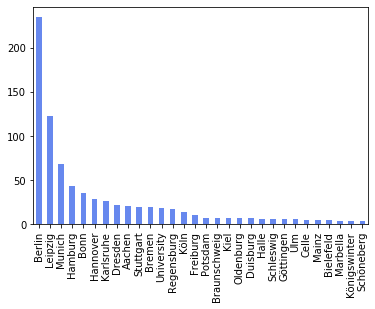

In [288]:
tweet_text['location_city'].value_counts()[0:30].plot(kind='bar')

### Top users by number of tweets

In [445]:
tweet_text['user'].value_counts() 

Nightmare_Keks     91
LarsKlingenberg    72
LeaksQuer          72
CITYGUIDEMUNICH    60
honeysnakefox      54
                   ..
Romy56174134        1
TAG24               1
ProtestCorona       1
Pollos_Hermario     1
sonntagticker       1
Name: user, Length: 1462, dtype: int64

 * from checking the top 3 account, they all seem to be anti-querdenken accounts

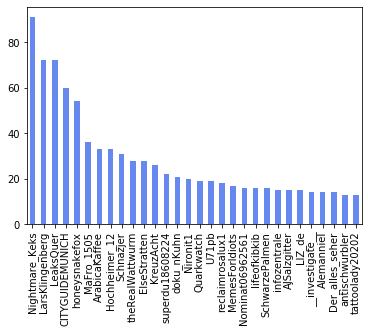

In [447]:
tweet_text['user'].value_counts()[0:30].plot(kind='bar')

### Top tweets by number of likes

In [387]:
tweet_text.sort_values(by=['favorite_count'], ascending=False)[['text','favorite_count']]

,text,favorite_count
1833,Bei #H2111 verglich eine 22-jährige Rednerin i...,4646
1458,Als eine #Querdenkerin in #Hannover den #Holoc...,4333
3011,"Mal etwas Lustiges zwischendurch aus der ""BERL...",2335
2345,"Angeblich sollen ""#Sanitäter"" am 18.11. bei #Q...",1180
750,» Das ist ein widerliches Schauspiel. So wie d...,1020
...,...,...
2579,"Und jetzt bitte nochmal die empörte, harmlose ...",0
628,Ihr habt Euch #Datenschutzgesetze aufdrücken l...,0
626,Äußerst treffend diese absurden Demonstratione...,0
621,Impro Satire am Dienstag Morgen #ElonMusk vs #...,0


## Sentiment Analysis

In [299]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction import DictVectorizer

### VaderSentiment metrics explained:
https://github.com/cjhutto/vaderSentiment 

https://github.com/noahberhe/COVID-19/blob/master/COVID-19%20Winners%20and%20Losers.ipynb

Pos: Proportion of the text that falls into the positive category: ie. no.pos words / total no.words

Neu: Proportion of the text that falls into the neutral category: ie. no.neu words / total no.words

Neg: Proportion of the text that falls into the negative category: ie. no.neg words / total no.words
... so these 3 metrics should up to 1 for a given text

Compound: Summing the valence scores of each word in the text, and normalized to between -1 (neg) and 1 (pos).
This gives us a polarity measure for that text.
It's normalized so can be used to compare different texts

Typical threshold values (used in the literature cited on this page) are:

* positive sentiment: compound score >= 0.05

* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)

* negative sentiment: compound score <= -0.05


In [484]:
#Sentiment Analysis
def vader_scorer(df):
    '''Compute vaderSentiment scores for each tweet
    Args: Dataframe containing a 'text' column
    Returns: Dataframe of vader scores
    '''
    analyzer = SentimentIntensityAnalyzer()
    vader_scores = df.loc[:,'text'].map(analyzer.polarity_scores)

    dvec = DictVectorizer()
    vader_scores = dvec.fit_transform(vader_scores)
    #print(vader_scores)
    
    vader_scores = pd.DataFrame(vader_scores.toarray(),columns=dvec.feature_names_)
    return vader_scores

### Examples

In [301]:
#example
sentences = ["Any questions, you # CovIdioten⁉ The death toll is currently as high as if a plane crashed every day. 😢 # solidarity instead of egoism # socialdistancing #BeSafe",  # translation en
             "Any questions, you # CovIdioten⁉ The death toll is currently as high as if a plane crashed every day. # solidarity instead of egoism # socialdistancing #BeSafe",  # translation en without emoji
             "questions covidioten⁉ the death toll currently high plane crashed every day 😢 solidarity instead egoism socialdistancing besafe",  # preprocessed english text
             "Noch Fragen, ihr #CovIdioten⁉ Die Todeszahlen sind aktuell so hoch, als würde jeden Tag ein Flugzeug abstürzen. 😢 #solidaritätstattegoismus #socialdistancing #BeSafe", # text in german
             "Noch Fragen, ihr #CovIdioten⁉ Die Todeszahlen sind aktuell so hoch, als würde jeden Tag ein Flugzeug abstürzen. #solidaritätstattegoismus #socialdistancing #BeSafe", # text in german without emoji
            ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))


Any questions, you # CovIdioten⁉ The death toll is currently as high as if a plane crashed every day. 😢 # solidarity instead of egoism # socialdistancing #BeSafe {'neg': 0.183, 'neu': 0.759, 'pos': 0.058, 'compound': -0.7003}
Any questions, you # CovIdioten⁉ The death toll is currently as high as if a plane crashed every day. # solidarity instead of egoism # socialdistancing #BeSafe {'neg': 0.114, 'neu': 0.821, 'pos': 0.065, 'compound': -0.4019}
questions covidioten⁉ the death toll currently high plane crashed every day 😢 solidarity instead egoism socialdistancing besafe {'neg': 0.257, 'neu': 0.662, 'pos': 0.081, 'compound': -0.7003}
Noch Fragen, ihr #CovIdioten⁉ Die Todeszahlen sind aktuell so hoch, als würde jeden Tag ein Flugzeug abstürzen. 😢 #solidaritätstattegoismus #socialdistancing #BeSafe {'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'compound': -0.7906}
Noch Fragen, ihr #CovIdioten⁉ Die Todeszahlen sind aktuell so hoch, als würde jeden Tag ein Flugzeug abstürzen. #solidaritätstatte

In [298]:
#tweet_text.to_csv ('/Users/darimapivovarova/Downloads/tweets_5000_cleaned.csv', index = False, header=True)

In [302]:
#example with a sarcastic tweet
sentences = ["If God wanted us to wear masks, we would have been born with them. #Covidiots #Corona", # en
             "god wanted us wear masks would born covidiots corona",  # pre processes en
             "Hätte Gott gewollt, dass wir Masken tragen, wären wir damit geboren worden. #Covidioten #Corona", # german
            ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))
    
    

If God wanted us to wear masks, we would have been born with them. #Covidiots #Corona {'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.2732}
god wanted us wear masks would born covidiots corona------------- {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.2732}
Hätte Gott gewollt, dass wir Masken tragen, wären wir damit geboren worden. #Covidioten #Corona {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [485]:
vader_scores = vader_scorer(tweet_text)
tweet_text = pd.concat([tweet_text,vader_scores], axis=1)
tweet_text = tweet_text.drop_duplicates(subset='id'#, ignore_index=True
                                       )



In [483]:
#del tweet_text['neg']

In [486]:
tweet_text.head()

,id,text,created_at,user,location,geo,coordinates,in_reply_to_status_id,retweet_count,favorite_count,...,text_cleaned,text_cleaned_without_stop_words,location_city,sentiment_class,text_cleaned_full,text_cleaned_full_without_stop_words,compound,neg,neu,pos
0,1332079879794417672,Hallo #Querdenken.\nZwei Tatsachen:\nDeutschla...,2020-11-26 21:52:46,felis_rex,Berlin,NaN,NaN,NaN,0,0,...,hallo #querdenken zwei tatsachen deutschland i...,hallo #querdenken zwei tatsachen deutschland d...,Berlin,1,hallo querdenken zwei tatsachen deutschland is...,hallo querdenken zwei tatsachen deutschland di...,-0.8439,0.197,0.803,0.0
1,1332079613015633920,Alice im Lügenland darf heute in den @tagesthe...,2020-11-26 21:51:43,BirgitKieschni1,"Bautzen, Sachsen",NaN,NaN,NaN,0,6,...,alice im lügenland darf heute in den ihre unw...,alice lügenland darf heute unwahrheiten verbre...,Bautzen,1,alice im lügenland darf heute in den ihre unw...,alice lügenland darf heute unwahrheiten verbre...,-0.6360,0.107,0.893,0.0
2,1332075645166374917,"Parkplätze gibt's, jetzt scheitert es halt am ...",2020-11-26 21:35:57,demoticker161,Berlin,NaN,NaN,NaN,0,0,...,parkplätze gibts jetzt scheitert es halt am we...,parkplätze gibts scheitert halt wetter #querde...,Berlin,3,parkplätze gibts jetzt scheitert es halt am we...,parkplätze gibts scheitert halt wetter querden...,0.0000,0.000,1.000,0.0
3,1332071626050048001,aaachso. #AttilaHildmann #Querdenken #Querdenk...,2020-11-26 21:19:59,2sofiaxy,NaN,NaN,NaN,NaN,0,1,...,aaachso #attilahildmann #querdenken #querdenke...,aaachso #attilahildmann #querdenken #querdenke...,NaN,3,aaachso attilahildmann querdenken querdenker i...,aaachso attilahildmann querdenken querdenker i...,0.0000,0.000,1.000,0.0
4,1332071317454118914,"Karel kritisiert, dass immer wieder Beiträge v...",2020-11-26 21:18:45,LeaksQuer,NaN,NaN,NaN,NaN,0,2,...,karel kritisiert dass immer wieder beiträge vo...,karel kritisiert immer beiträge neonazis #quer...,NaN,1,karel kritisiert dass immer wieder beiträge vo...,karel kritisiert immer beiträge neonazis querd...,-0.5994,0.196,0.804,0.0


In [487]:
#Focus on 'compound' scores
# Create a new column called 'sentiment_class'
sentimentclass_list = []

for i in range(0, len(tweet_text)):
    
    # current 'compound' score:
    curr_compound = tweet_text.iloc[i,:]['compound']
    
    if (curr_compound <= 1.0 and curr_compound >= 0.55):
        sentimentclass_list.append(5)
    elif (curr_compound < 0.55 and curr_compound >= 0.10):
        sentimentclass_list.append(4)
    elif (curr_compound < 0.10 and curr_compound > -0.10):
        sentimentclass_list.append(3)
    elif (curr_compound <= -0.10 and curr_compound > -0.55):
        sentimentclass_list.append(2)
    elif (curr_compound <= -0.55 and curr_compound >= -1.00):
        sentimentclass_list.append(1)

# Add the new column 'sentiment_class' to the dataframe
tweet_text['sentiment_class'] = sentimentclass_list

# Check out the new column
tweet_text['sentiment_class']

0       1
1       1
2       3
3       3
4       1
       ..
3199    1
3200    3
3201    1
3202    1
3203    1
Name: sentiment_class, Length: 3204, dtype: int64

In [488]:
tweet_text['sentiment_class'].value_counts() 

3    1485
1    1399
2     152
4     108
5      60
Name: sentiment_class, dtype: int64

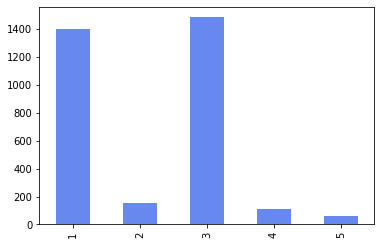

In [331]:
tweet_text['sentiment_class'].value_counts().sort_index().plot(kind='bar')

[Text(0, 0, '-1.0'),
 Text(1, 0, '-0.8'),
 Text(2, 0, '-0.6'),
 Text(3, 0, '-0.3999999999999999'),
 Text(4, 0, '-0.19999999999999996'),
 Text(5, 0, '0.0'),
 Text(6, 0, '0.20000000000000018'),
 Text(7, 0, '0.40000000000000013'),
 Text(8, 0, '0.6000000000000001'),
 Text(9, 0, '0.8'),
 Text(10, 0, '1.0')]

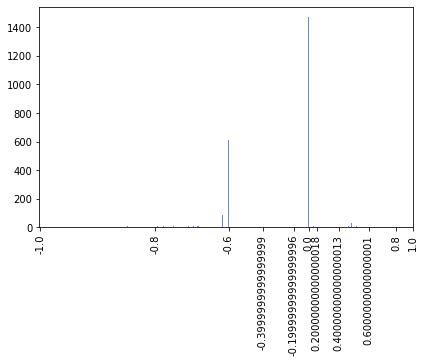

In [345]:
s=tweet_text['compound'].value_counts().sort_index()
ax=s.plot(kind='bar')
ax.figure.tight_layout()
new_ticks = np.linspace(-1, 1, 11)  
# positions of each tick, relative to the indices of the x-values
ax.set_xticks(np.interp(new_ticks, s.index, np.arange(s.size)))

# labels
ax.set_xticklabels(new_ticks)

# Words by occurance

In [525]:
# fllowing tutorial: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/
# Split the words from one tweet into unique elements
tweet_text['text_cleaned_full_without_stop_words'][0].split()

['hallo',
 'querdenken',
 'zwei',
 'tatsachen',
 'deutschland',
 'dichter',
 'bewohnt',
 'usa',
 'usa',
 'viertelmillion',
 'menschen',
 'verloren',
 'millionen',
 'erleiden',
 'behinderungen',
 'ganz',
 'aussehen',
 'leute',
 'hören']

In [490]:
# Create a list of lists containing all words for each tweet
words_in_tweet = [tweet.split() for tweet in tweet_text['text_cleaned_full_without_stop_words']]
words_in_tweet[:2]

[['hallo',
  'querdenken',
  'zwei',
  'tatsachen',
  'deutschland',
  'dichter',
  'bewohnt',
  'usa',
  'usa',
  'viertelmillion',
  'menschen',
  'verloren',
  'millionen',
  'erleiden',
  'behinderungen',
  'ganz',
  'aussehen',
  'leute',
  'hören'],
 ['alice',
  'lügenland',
  'darf',
  'heute',
  'unwahrheiten',
  'verbreiten',
  'tja',
  'beispiel',
  'bautzen',
  'struktur',
  'neuenrechten',
  'darlegen',
  'afd',
  'reichsbürger',
  'ib',
  'querdenken',
  'bewegung',
  'kommst']]

In [491]:
import itertools
import collections

In [492]:
# List of all words across tweets , flattening the list of lists
all_words = list(itertools.chain(*words_in_tweet))

In [493]:
# Create counter
counts_no_urls = collections.Counter(all_words)

counts_no_urls.most_common(30)

[('querdenken', 2944),
 ('covidioten', 418),
 ('querdenker', 415),
 ('corona', 259),
 ('mal', 256),
 ('leipzig', 237),
 ('janaauskassel', 192),
 ('afd', 180),
 ('heute', 179),
 ('mehr', 177),
 ('polizei', 176),
 ('demo', 172),
 ('amp', 170),
 ('hannover', 169),
 ('berlin', 154),
 ('coronaleugner', 152),
 ('schon', 147),
 ('immer', 146),
 ('ja', 139),
 ('noafd', 138),
 ('sophiescholl', 131),
 ('sophie', 128),
 ('scholl', 127),
 ('menschen', 118),
 ('nazis', 117),
 ('wer', 103),
 ('geht', 99),
 ('gibt', 97),
 ('wurde', 91),
 ('einfach', 90)]

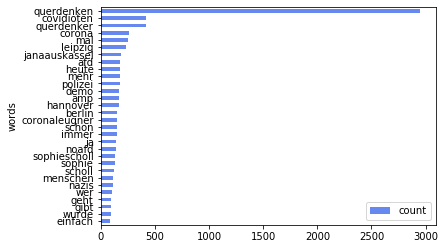

In [494]:
words_by_occurance = pd.DataFrame(counts_no_urls.most_common(30),
                             columns=['words', 'count'])

words_by_occurance.sort_values(by=['count'], ascending=True).plot(x='words', y='count',kind='barh' )

# Explore Co-occurring Words (Bigrams)

In [389]:
from nltk import bigrams

In [495]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in words_in_tweet]

# View bigrams for the first tweet
terms_bigram[0]

[('hallo', 'querdenken'),
 ('querdenken', 'zwei'),
 ('zwei', 'tatsachen'),
 ('tatsachen', 'deutschland'),
 ('deutschland', 'dichter'),
 ('dichter', 'bewohnt'),
 ('bewohnt', 'usa'),
 ('usa', 'usa'),
 ('usa', 'viertelmillion'),
 ('viertelmillion', 'menschen'),
 ('menschen', 'verloren'),
 ('verloren', 'millionen'),
 ('millionen', 'erleiden'),
 ('erleiden', 'behinderungen'),
 ('behinderungen', 'ganz'),
 ('ganz', 'aussehen'),
 ('aussehen', 'leute'),
 ('leute', 'hören')]

In [496]:
tweet_text['text_cleaned_full_without_stop_words'][0]

'hallo querdenken zwei tatsachen deutschland dichter bewohnt usa usa viertelmillion menschen verloren millionen erleiden behinderungen ganz aussehen leute hören'

In [497]:
#flattening the list of bigrams
all_bigrams = list(itertools.chain(*terms_bigram))

In [498]:
# Create counter for most common bigrams
counts_bigrams = collections.Counter(all_bigrams)

counts_bigrams.most_common(30)

[(('querdenken', 'covidioten'), 155),
 (('querdenker', 'querdenken'), 132),
 (('sophie', 'scholl'), 114),
 (('querdenken', 'querdenker'), 89),
 (('dummdenken', 'querdenken'), 71),
 (('covidioten', 'querdenken'), 69),
 (('querdenken', 'demo'), 49),
 (('jana', 'kassel'), 40),
 (('anne', 'frank'), 38),
 (('querdenken', 'querlenker'), 38),
 (('querdenken', 'hannover'), 36),
 (('coronaleugner', 'maskenverweigerer'), 36),
 (('sekte', 'querdenken'), 34),
 (('afd', 'querdenken'), 33),
 (('coronagipfel', 'corona'), 33),
 (('querlenker', 'leerdenker'), 32),
 (('leerdenker', 'coronaleugner'), 32),
 (('corona', 'querdenken'), 31),
 (('janaauskassel', 'querdenken'), 31),
 (('querdenken', 'afd'), 30),
 (('covidioten', 'covidiots'), 30),
 (('keinplatzfürnazis', 'coronagipfel'), 30),
 (('noafd', 'fcknzs'), 27),
 (('covidiots', 'querdenker'), 26),
 (('hannover', 'querdenken'), 24),
 (('michael', 'ballweg'), 23),
 (('querdenken', 'demos'), 23),
 (('covidioten', 'corona'), 23),
 (('fcknzs', 'keinplatzfür

In [499]:
#to data frame
bigrams_by_occurance = pd.DataFrame(counts_bigrams.most_common(30),
                             columns=['bigrams', 'count'])

## Visualize bigrams

In [500]:
import networkx as nx

In [501]:
# Create dictionary of bigrams and their counts
d = bigrams_by_occurance.set_index('bigrams').T.to_dict('records')

In [502]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 9))

#G.add_node("china", weight=100)

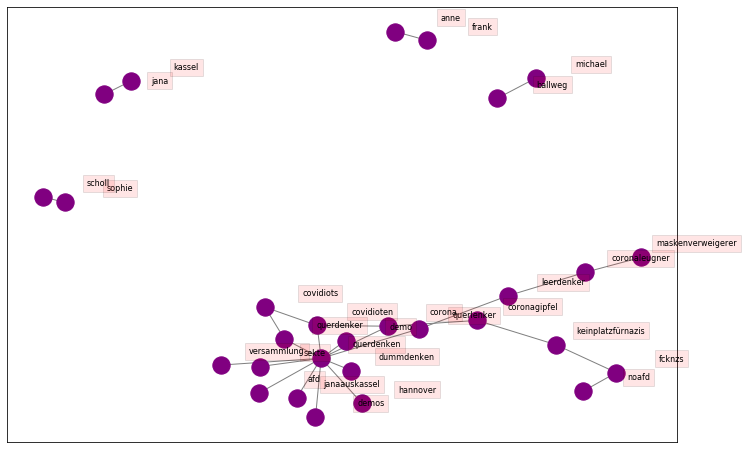

In [503]:
fig, ax = plt.subplots(figsize=(12, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=1,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.1),
            horizontalalignment='center', fontsize=8)
    
plt.show()

### Bigrams for hashtags

In [507]:
# the same for hashtags
#tweet_text['text_cleaned'][0]
def leave_hashtags(text):
    text=re.findall('#\w+', text)
    return text

In [510]:
tweet_text['text_hashtags_only']=tweet_text['text_cleaned'].apply(lambda x: leave_hashtags(x)).apply(lambda x: ' '.join(x))

In [511]:
tweet_text.head()

,id,text,created_at,user,location,geo,coordinates,in_reply_to_status_id,retweet_count,favorite_count,...,text_cleaned_without_stop_words,location_city,sentiment_class,text_cleaned_full,text_cleaned_full_without_stop_words,compound,neg,neu,pos,text_hashtags_only
0,1332079879794417672,Hallo #Querdenken.\nZwei Tatsachen:\nDeutschla...,2020-11-26 21:52:46,felis_rex,Berlin,NaN,NaN,NaN,0,0,...,hallo #querdenken zwei tatsachen deutschland d...,Berlin,1,hallo querdenken zwei tatsachen deutschland is...,hallo querdenken zwei tatsachen deutschland di...,-0.8439,0.197,0.803,0.0,#querdenken
1,1332079613015633920,Alice im Lügenland darf heute in den @tagesthe...,2020-11-26 21:51:43,BirgitKieschni1,"Bautzen, Sachsen",NaN,NaN,NaN,0,6,...,alice lügenland darf heute unwahrheiten verbre...,Bautzen,1,alice im lügenland darf heute in den ihre unw...,alice lügenland darf heute unwahrheiten verbre...,-0.6360,0.107,0.893,0.0,#bautzen #neuenrechten #afd #reichsbürger #ib ...
2,1332075645166374917,"Parkplätze gibt's, jetzt scheitert es halt am ...",2020-11-26 21:35:57,demoticker161,Berlin,NaN,NaN,NaN,0,0,...,parkplätze gibts scheitert halt wetter #querde...,Berlin,3,parkplätze gibts jetzt scheitert es halt am we...,parkplätze gibts scheitert halt wetter querden...,0.0000,0.000,1.000,0.0,#querdenken #noquerdenken #leerdenker
3,1332071626050048001,aaachso. #AttilaHildmann #Querdenken #Querdenk...,2020-11-26 21:19:59,2sofiaxy,NaN,NaN,NaN,NaN,0,1,...,aaachso #attilahildmann #querdenken #querdenke...,NaN,3,aaachso attilahildmann querdenken querdenker i...,aaachso attilahildmann querdenken querdenker i...,0.0000,0.000,1.000,0.0,#attilahildmann #querdenken #querdenker #impfe...
4,1332071317454118914,"Karel kritisiert, dass immer wieder Beiträge v...",2020-11-26 21:18:45,LeaksQuer,NaN,NaN,NaN,NaN,0,2,...,karel kritisiert immer beiträge neonazis #quer...,NaN,1,karel kritisiert dass immer wieder beiträge vo...,karel kritisiert immer beiträge neonazis querd...,-0.5994,0.196,0.804,0.0,#querdenken


In [512]:
# Create a list of lists containing all words for each tweet
hashtags_in_tweet = [tweet.split() for tweet in tweet_text['text_hashtags_only']]
hashtags_in_tweet[:2]


[['#querdenken'],
 ['#bautzen', '#neuenrechten', '#afd', '#reichsbürger', '#ib', '#querdenken']]

In [514]:
# Create list of lists containing bigrams in tweets
hashtags_bigram = [list(bigrams(tweet)) for tweet in hashtags_in_tweet]

# View bigrams for the first tweet
hashtags_bigram[1]

[('#bautzen', '#neuenrechten'),
 ('#neuenrechten', '#afd'),
 ('#afd', '#reichsbürger'),
 ('#reichsbürger', '#ib'),
 ('#ib', '#querdenken')]

In [515]:
#flattening the list of hashtag bigrams
hashtag_bigrams = list(itertools.chain(*hashtags_bigram))

In [516]:
# Create counter for most common bigrams
counts_hashtag_bigrams = collections.Counter(hashtag_bigrams)

counts_hashtag_bigrams.most_common(30)

[(('#querdenken', '#covidioten'), 170),
 (('#querdenker', '#querdenken'), 163),
 (('#querdenken', '#querdenker'), 99),
 (('#covidioten', '#querdenken'), 79),
 (('#dummdenken', '#querdenken'), 71),
 (('#janaauskassel', '#querdenken'), 61),
 (('#querdenken', '#afd'), 47),
 (('#querdenken', '#hannover'), 47),
 (('#corona', '#querdenken'), 46),
 (('#afd', '#querdenken'), 45),
 (('#querdenken', '#leipzig'), 38),
 (('#querdenken', '#querlenker'), 38),
 (('#coronaleugner', '#maskenverweigerer'), 36),
 (('#querdenken', '#noafd'), 33),
 (('#coronagipfel', '#corona'), 33),
 (('#querlenker', '#leerdenker'), 32),
 (('#leerdenker', '#coronaleugner'), 32),
 (('#leipzig', '#querdenken'), 31),
 (('#querdenken', '#corona'), 30),
 (('#sophiescholl', '#querdenken'), 30),
 (('#covidioten', '#covidiots'), 30),
 (('#keinplatzfürnazis', '#coronagipfel'), 30),
 (('#berlin', '#querdenken'), 29),
 (('#hannover', '#querdenken'), 29),
 (('#noafd', '#fcknzs'), 27),
 (('#coronaleugner', '#querdenken'), 26),
 (('#ma

In [521]:
#to data frame
hashtag_bigrams_by_occurance = pd.DataFrame(counts_hashtag_bigrams.most_common(50),
                             columns=['hashtag_bigrams', 'count'])

### Visualize hashtags as bigrams

In [522]:
# Create dictionary of bigrams and their counts
d2 = hashtag_bigrams_by_occurance.set_index('hashtag_bigrams').T.to_dict('records')

In [523]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d2[0].items():
    G.add_edge(k[0], k[1], weight=(v * 9))

#G.add_node("china", weight=100)

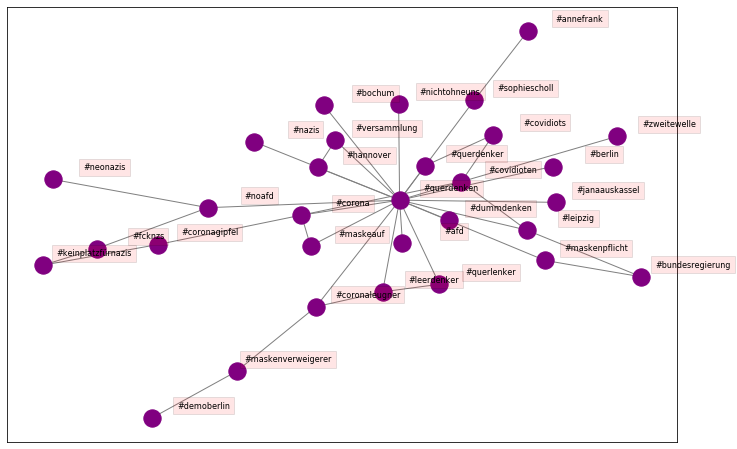

In [524]:
fig, ax = plt.subplots(figsize=(12, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=1,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.1),
            horizontalalignment='center', fontsize=8)
    
plt.show()

## What I've learnt:

* get familiar with Twitter API and tweepy moule in python: fetch and post tweets and reply to tweets, 7 days, no clean geo data
* writing simple functions and use pandas.apply() method
* regular expressions
* sentiment analysis basics and NLP basics with nltk package
* correlations between hashtags used in tweets
* from fetched data majority of the posts are from people against #querdenken movement; to get #querdenken posts one might look into telegram